# Proteotyping of pure bacterial cultures
Pure cultures of four species of bacteria: *Escherichia coli*, *Pseudomonas aeruginosa*, *Staphyoloccus aureus*, *Streptococcus pneumoniae*. Each species was grown in three identical replicates and run through the proteotyping workflow.

The first cell imports the required libraries.


In [1]:
import matplotlib as mpl, matplotlib
matplotlib.use("Agg")
%matplotlib inline
from pylab import *
import numpy as np
import pandas as pd
from scipy.stats import sem
from os import listdir, path


pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Bacterial samples proteotyping raw data
Raw data from the proteotyping of real bacterial samples was manually entered into the next cell of the notebook.

In [2]:
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra = pd.Series([2238, 3367, 3372,
                        2995, 1698, 3580,
                        2724, 2227, 2847,
                        #1585, 2359, 2809], # EU295-EU297 CCUG 28588 (R6)
                        #2668, 2697, 2849], # EU317-EU319 CCUG 35272
                        3774, 3705, 3190], # EU405-EU407 CCUG 28588 (R6)
                        #1986, 1143, 2275], # Roger's samples; not for us!
                       name="Number of spectra")
discriminative_fragments = pd.Series([287, 380, 418,
                                      1434, 823, 1697,
                                      1435, 1123, 1496,
                                      #195, 317, 382], # EU295-EU297 CCUG 28588 (R6)
                                      #358, 349, 393], # EU317-EU319 CCUG 35272
                                      465, 433, 352], # EU405-EU407 CCUG 28588 (R6)
                                      #290, 169, 319],# Roger's samples; not for us!
                                     name="Discriminative fragments")
correct_assignments = pd.Series([262, 348, 379,
                                   1417, 813, 1674, 
                                   1415, 1111, 1481,
                                   #179, 280, 328], # EU295-EU297 CCUG 28588 (R6)
                                   #327, 314, 363], # EU317-EU319 CCUG 35272
                                   437, 398, 326], # EU405-EU407 CCUG 28588 (R6)
                                   #270, 157, 291], # Roger's samples; not for us!
                                name="Correct assignments")
TPR = pd.Series(correct_assignments / discriminative_fragments, name="True positive rate (TPR)")
raw_data = pd.DataFrame([species, numspectra, discriminative_fragments, correct_assignments, TPR]).transpose()
print raw_data

          Species Number of spectra Discriminative fragments Correct assignments True positive rate (TPR)
0         E. coli              2238                      287                 262                 0.912892
1         E. coli              3367                      380                 348                0.9157895
2         E. coli              3372                      418                 379                0.9066986
3   P. aeruginosa              2995                     1434                1417                 0.988145
4   P. aeruginosa              1698                      823                 813                0.9878493
5   P. aeruginosa              3580                     1697                1674                0.9864467
6       S. aureus              2724                     1435                1415                0.9860627
7       S. aureus              2227                     1123                1111                0.9893143
8       S. aureus              2847           

In [3]:
print "Means"
print raw_data.groupby("Species").aggregate(lambda x: np.mean(x))
print "Standard deviations"
print raw_data.groupby("Species").aggregate(lambda x: np.std(x))
print "Overall maximum:", np.max(raw_data["Number of spectra"]) 
print "Overall minimum:", np.min(raw_data["Number of spectra"])

Means
               Number of spectra  Discriminative fragments  Correct assignments  True positive rate (TPR)
Species                                                                                                  
E. coli              2992.333333                361.666667           329.666667                  0.911793
P. aeruginosa        2757.666667               1318.000000          1301.333333                  0.987480
S. aureus            2599.333333               1351.333333          1335.666667                  0.988450
S. pneumoniae        3556.333333                416.666667           387.000000                  0.928363
Standard deviations
               Number of spectra  Discriminative fragments  Correct assignments  True positive rate (TPR)
Species                                                                                                  
E. coli               533.398121                 55.029285            49.492985                  0.003792
P. aeruginosa       

## Pure bacterial samples barchart
Plot a barchart of the average sensitivity for each species, along with standard error bars (SEM) to indicate the variability of the results.

In [4]:
means_sems = raw_data.groupby("Species")["True positive rate (TPR)"].aggregate([lambda x: np.mean(x), sem])
print means_sems
names = means_sems.index
means = means_sems["<lambda>"]
sems = means_sems["sem"]

               <lambda>       sem
Species                          
E. coli        0.911793  0.002681
P. aeruginosa  0.987480  0.000524
S. aureus      0.988450  0.001209
S. pneumoniae  0.928363  0.006055


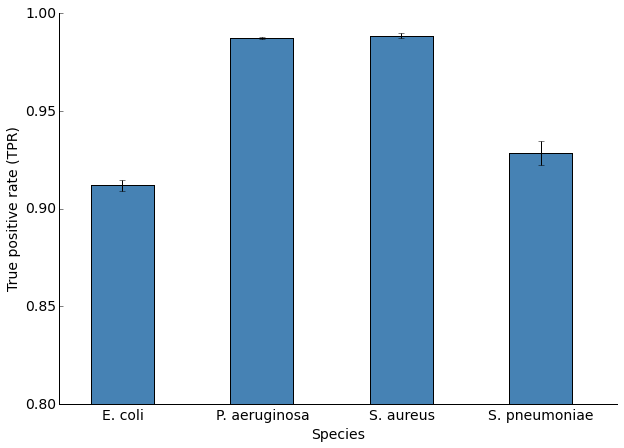

In [5]:
font = {"family": "sans",
        "weight": "normal",
        "size": 14}
mpl.rc("font", **font)

indices = np.arange(0, len(means_sems))
width = 0.45

fig, ax = plt.subplots()
rects = ax.bar(indices, means, width, yerr=sems, color="steelblue", error_kw=dict(ecolor="black"))
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.xaxis.set_ticks_position("none")
ax.yaxis.set_ticks_position("left")

# Adjust plot area, set tick labels
ylim([0.8, 1])
xlim([-width/2, len(names)-width/2])
xlabel("Species")
ylabel("True positive rate (TPR)")
ax.set_xticks(indices + width/2)
ax.set_xticklabels(names)

# Adjust figure size, save figures
fig.set_figheight(7)
fig.set_figwidth(10)
plt.savefig("real_cultures_tpr.png")
plt.savefig("real_cultures_tpr.pdf")

# Mixed samples
Mixed samples with equal ratio of all four species were run (1:1:1:1).

In [6]:
# Raw data for mixed samples
species = pd.Series(["E. coli", "E. coli", "E. coli", 
                     "P. aeruginosa", "P. aeruginosa", "P. aeruginosa", 
                     "S. aureus", "S. aureus", "S. aureus", 
                     "S. pneumoniae", "S. pneumoniae", "S. pneumoniae"],
                   name="Species")
numspectra_mix = pd.Series([2753, 3418, 3144,
                        2753, 3418, 3144,
                        2753, 3418, 3144,
                        2753, 3418, 3144],
                       name="Number of spectra")
discriminative_fragments = pd.Series([736, 943, 899,
                                      736, 943, 899,
                                      736, 943, 899,
                                      736, 943, 899],
                                     name="Discriminative fragments")
species_assignments = pd.Series([61,  72,  63,
                                 344, 403, 378, 
                                 246, 360, 358,
                                 67,  84,  82], 
                                name="Species assignments")
estimated_abundance = pd.Series(species_assignments / discriminative_fragments, name="Estimated abundance")
mix_data = pd.DataFrame([species, numspectra_mix, discriminative_fragments, species_assignments, estimated_abundance]).transpose()
print mix_data

          Species Number of spectra Discriminative fragments Species assignments Estimated abundance
0         E. coli              2753                      736                  61          0.08288043
1         E. coli              3418                      943                  72          0.07635207
2         E. coli              3144                      899                  63          0.07007786
3   P. aeruginosa              2753                      736                 344           0.4673913
4   P. aeruginosa              3418                      943                 403           0.4273595
5   P. aeruginosa              3144                      899                 378           0.4204672
6       S. aureus              2753                      736                 246           0.3342391
7       S. aureus              3418                      943                 360           0.3817603
8       S. aureus              3144                      899                 358           

In [7]:
print "Means"
print mix_data.groupby("Species").aggregate(lambda x: np.mean(x))
print "Standard deviations"
print mix_data.groupby("Species").aggregate(lambda x: np.std(x))
print "Overall average spectra:", np.mean(mix_data["Number of spectra"])
print "Overall average discriminative:", np.mean(mix_data["Discriminative fragments"])
print "Overall maximum:", np.max(mix_data["Number of spectra"]) 
print "Overall minimum:", np.min(mix_data["Number of spectra"])

Means
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli                     3105                859.333333            65.333333             0.076437
P. aeruginosa               3105                859.333333           375.000000             0.438406
S. aureus                   3105                859.333333           321.333333             0.371407
S. pneumoniae               3105                859.333333            77.666667             0.090441
Standard deviations
               Number of spectra  Discriminative fragments  Species assignments  Estimated abundance
Species                                                                                             
E. coli               272.882148                 89.040565             4.784233             0.005227
P. aeruginosa         272.882148                 89.040565       

## Adjustment ratios
The adjustment ratio used to modify the raw estimations of abundance are calculated from the TPR data of the pure bacterial cultures.  

In [8]:
# Compute adjustment ratios based on data from pure samples
adjustment_ratios = {}
for name, group in raw_data.groupby("Species"):
    adjustment_ratios[name] = np.mean(group["Correct assignments"] / group["Number of spectra"])

# Add a column with corrected values for estimated abundance
adjusted_abundance = pd.Series(index=mix_data.index)
for row in mix_data.iterrows():
    adjusted_abundance[row[0]] = row[1]["Estimated abundance"] / adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Corrected abundance'] = adjusted_abundance

print mix_data

          Species Number of spectra Discriminative fragments Species assignments Estimated abundance  Corrected abundance
0         E. coli              2753                      736                  61          0.08288043             0.747072
1         E. coli              3418                      943                  72          0.07635207             0.688226
2         E. coli              3144                      899                  63          0.07007786             0.631671
3   P. aeruginosa              2753                      736                 344           0.4673913             0.987782
4   P. aeruginosa              3418                      943                 403           0.4273595             0.903179
5   P. aeruginosa              3144                      899                 378           0.4204672             0.888612
6       S. aureus              2753                      736                 246           0.3342391             0.651737
7       S. aureus       

## Plot mixture and adjusted mixture results
The per species results from the mixed samples are plotted in a bar plot with standard error bars. The adjusted values are plotted alongside the raw per species TPR from the mixed samples to illustrate how adjusting the values improve the results. 

In [9]:
# Reduce estimated abundances for the mixed samples for use in bar plot
mix_means_sems = mix_data.groupby("Species")["Estimated abundance"].aggregate([lambda x: np.mean(x), sem])
print "Mixed samples without correction"
print mix_means_sems
mix_names = mix_means_sems.index
mix_means = mix_means_sems["<lambda>"]
mix_sems = mix_means_sems["sem"]

# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected = mix_data.groupby("Species")["Corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print "Mixed samples with correction"
print mix_means_sems_corrected
mix_means_corrected = mix_means_sems_corrected["<lambda>"]
mix_sems_corrected = mix_means_sems_corrected["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized = mix_means_corrected / sum(mix_means_corrected)
mix_sems_corrected_normalized = mix_sems_corrected / sum(mix_means_corrected) 
print "\nNormalized mixed samples with correction"
print "{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM")
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized, mix_sems_corrected_normalized):
    print "{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2)

Mixed samples without correction
               <lambda>       sem
Species                          
E. coli        0.076437  0.003696
P. aeruginosa  0.438406  0.014629
S. aureus      0.371407  0.019182
S. pneumoniae  0.090441  0.000684
Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        0.688990  0.033315
P. aeruginosa  0.926524  0.030916
S. aureus      0.724210  0.037402
S. pneumoniae  0.833789  0.006303

Normalized mixed samples with correction
Species        Abundance      SEM
E. coli        0.217106  0.010498
P. aeruginosa  0.291955  0.009742
S. aureus      0.228205  0.011786
S. pneumoniae  0.262734  0.001986


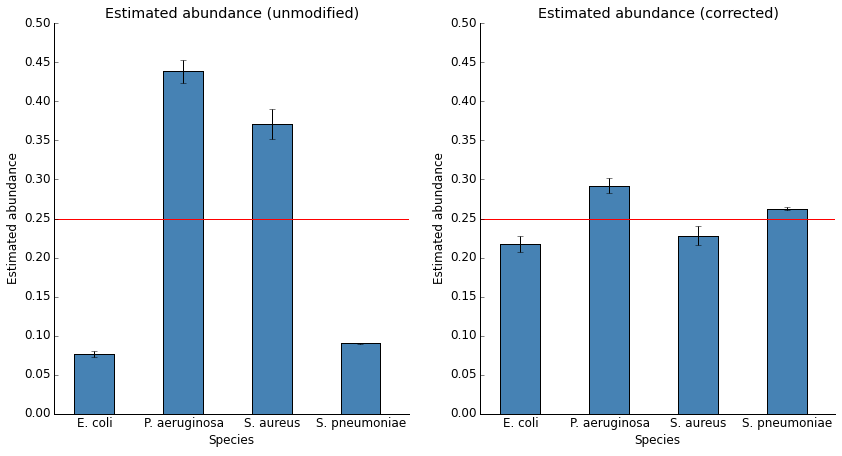

In [10]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with two subplots axes
fig_mix, (ax_mix1, ax_mix2) = plt.subplots(1, 2) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.5])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unmodified)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names)
ax_mix1.set_yticks(np.arange(0, 0.51, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.5])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (corrected)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names)
ax_mix2.set_yticks(np.arange(0, 0.51, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(14)
plt.savefig("real_cultures_mix_tpr.png")
plt.savefig("real_cultures_mix_tpr.pdf")

# Supplementary figure normalized with in-silico results

In [11]:
# Add a column with in-silico-corrected values for estimated abundance
insilico_abundance = pd.Series(index=mix_data.index)
insilico_adjustment_ratios = {"E. coli": 0.2704, 
                              "P. aeruginosa": 0.5571, 
                              "S. aureus":  0.5227, 
                              "S. pneumoniae": 0.1788}
for row in mix_data.iterrows():
    insilico_abundance[row[0]] = row[1]["Estimated abundance"] / insilico_adjustment_ratios[row[1]["Species"]]
mix_data.loc[:,'Insilico corrected abundance'] = insilico_abundance


# Reduce corrected abundance estimates for use in bar plot
mix_means_sems_corrected_insilico = mix_data.groupby("Species")["Insilico corrected abundance"].aggregate([lambda x: np.mean(x), sem])
print "Mixed samples with correction"
print mix_means_sems_corrected_insilico
mix_means_corrected_insilico = mix_means_sems_corrected_insilico["<lambda>"]
mix_sems_corrected_insilico = mix_means_sems_corrected_insilico["sem"]

# Normalize the corrected abundance estimates for the mixed samples
mix_means_corrected_normalized_insilico = mix_means_corrected_insilico / sum(mix_means_corrected_insilico)
mix_sems_corrected_normalized_insilico = mix_sems_corrected_insilico / sum(mix_means_corrected_insilico) 
print "\nNormalized mixed samples with in silico correction"
print "{:<14} {:>8} {:>8}".format("Species", "Abundance", "SEM")
for species, v1, v2 in zip(mix_names, mix_means_corrected_normalized_insilico, mix_sems_corrected_normalized_insilico):
    print "{:<14} {:<1.6f}  {:<1.6f}".format(species, v1, v2)

Mixed samples with correction
               <lambda>       sem
Species                          
E. coli        0.282680  0.013669
P. aeruginosa  0.786943  0.026258
S. aureus      0.710554  0.036697
S. pneumoniae  0.505821  0.003824

Normalized mixed samples with in silico correction
Species        Abundance      SEM
E. coli        0.123657  0.005979
P. aeruginosa  0.344245  0.011487
S. aureus      0.310829  0.016053
S. pneumoniae  0.221269  0.001673


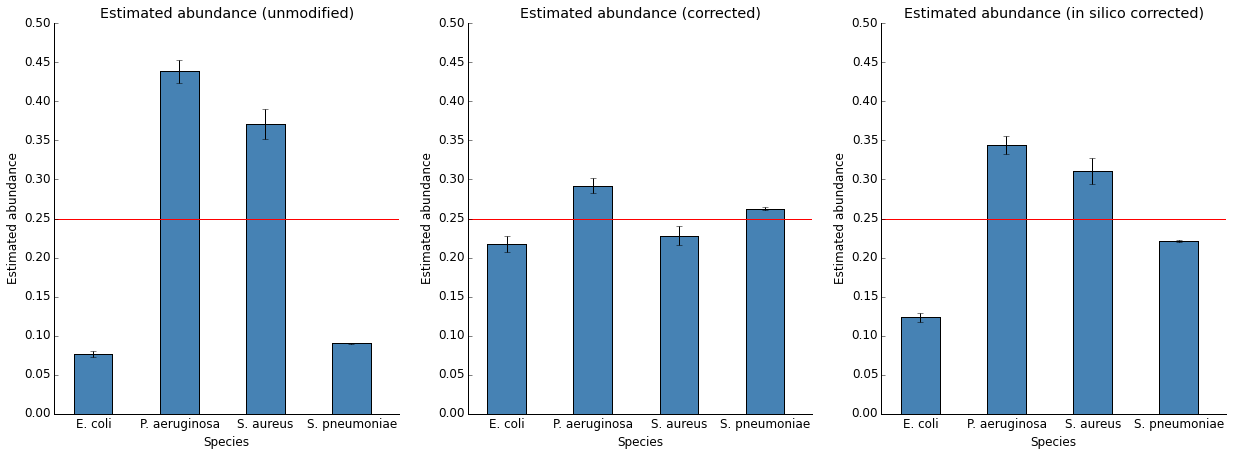

In [13]:
# Adjust bar plot settings
font = {"family": "sans",
        "weight": "normal",
        "size": 12}
mpl.rc("font", **font)
indices = np.arange(0, len(mix_names))
width = 0.45

# Create plot figure with three  subplots axes
fig_mix, (ax_mix1, ax_mix2, ax_mix3) = plt.subplots(1, 3) #, sharey=True)

# First plot with raw unmodified abundance estimations
rects_mix1 = ax_mix1.bar(indices, 
                         mix_means, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems, 
                         error_kw=dict(ecolor="black"))
ax_mix1.spines["top"].set_color("none")
ax_mix1.spines["right"].set_color("none")
ax_mix1.xaxis.set_ticks_position("none")
ax_mix1.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix1.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix1.set_ylim([0, 0.5])
ax_mix1.set_xlabel("Species")
ax_mix1.set_ylabel("Estimated abundance")
ax_mix1.set_title("Estimated abundance (unmodified)")
ax_mix1.set_xticks(indices + width/2)
ax_mix1.set_xticklabels(mix_names)
ax_mix1.set_yticks(np.arange(0, 0.51, 0.05))
# Place expected ratio line
ax_mix1.plot([-.5,4], [0.25,0.25], color="r")

# Second plot with corrected and normalized estimated abundances
rects_mix2 = ax_mix2.bar(indices, 
                         mix_means_corrected_normalized, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized,  
                         error_kw=dict(ecolor="black"))
ax_mix2.spines["top"].set_color("none")
ax_mix2.spines["right"].set_color("none")
ax_mix2.xaxis.set_ticks_position("none")
ax_mix2.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix2.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix2.set_ylim([0, 0.5])
ax_mix2.set_xlabel("Species")
ax_mix2.set_ylabel("Estimated abundance")
ax_mix2.set_title("Estimated abundance (corrected)")
ax_mix2.set_xticks(indices + width/2)
ax_mix2.set_xticklabels(mix_names)
ax_mix2.set_yticks(np.arange(0, 0.51, 0.05))
# Place expected ratio line
ax_mix2.plot([-.5,4], [0.25,0.25], color="r")

# Third plot with in silico corrected and normalized estimated abundances
rects_mix3 = ax_mix3.bar(indices, 
                         mix_means_corrected_normalized_insilico, 
                         width, 
                         color="steelblue", 
                         yerr=mix_sems_corrected_normalized_insilico,  
                         error_kw=dict(ecolor="black"))
ax_mix3.spines["top"].set_color("none")
ax_mix3.spines["right"].set_color("none")
ax_mix3.xaxis.set_ticks_position("none")
ax_mix3.yaxis.set_ticks_position("left")
# Adjust plot area, set tick labels
ax_mix3.set_xlim([-width/2, len(mix_names)-width/2])
ax_mix3.set_ylim([0, 0.5])
ax_mix3.set_xlabel("Species")
ax_mix3.set_ylabel("Estimated abundance")
ax_mix3.set_title("Estimated abundance (in silico corrected)")
ax_mix3.set_xticks(indices + width/2)
ax_mix3.set_xticklabels(mix_names)
ax_mix3.set_yticks(np.arange(0, 0.51, 0.05))
# Place expected ratio line
ax_mix3.plot([-.5,4], [0.25,0.25], color="r")

# Adjust figure size, save figures
fig_mix.set_figheight(7)
fig_mix.set_figwidth(21)
plt.savefig("real_cultures_mix_tpr_insilico.png")
plt.savefig("real_cultures_mix_tpr_insilico.pdf")

In [19]:
print mix_data[["Species", "Estimated abundance", "Corrected abundance", "Insilico corrected abundance"]]

          Species Estimated abundance  Corrected abundance  Insilico corrected abundance
0         E. coli          0.08288043             0.747072                      0.306510
1         E. coli          0.07635207             0.688226                      0.282367
2         E. coli          0.07007786             0.631671                      0.259164
3   P. aeruginosa           0.4673913             0.987782                      0.838972
4   P. aeruginosa           0.4273595             0.903179                      0.767115
5   P. aeruginosa           0.4204672             0.888612                      0.754743
6       S. aureus           0.3342391             0.651737                      0.639447
7       S. aureus           0.3817603             0.744399                      0.730362
8       S. aureus           0.3982202             0.776495                      0.761852
9   S. pneumoniae          0.09103261             0.839245                      0.509131
10  S. pneumoniae    